<h1 class="alert alert-success">Diviser pour régner :<br>
    
Rotation d'une image de 90°</h1>

Nous aurons besoin du module PIL Image pour la manipulation d'image pixel par pixel.

<h2 class="alert alert-warning">Documentation PIL Image</h2>

https://pillow.readthedocs.io/en/stable/reference/Image.html

In [1]:
from PIL import Image  

Les fonctions de base utiles dans ce TP sont :

1. **img = Image.open('adresse du fichier image')** : ouvre une image (objet PIL Image)
2. **(L, H) = img.size** : renvoie un tuple (largeur, hauteur)
3. **m = img.load()** : renvoie une matrice de pixels (codage (R,G,B)) : accès en r/w avec **m[x, y]**
        Remarque : les modifications de m se répercutent sur img.
4. **img.show()** : affiche l'image

Précisions sur les coordonnées :
- x est horizontal
- y est vertical


    - (0, 0) est le coin supérieur gauche (NO)
    - (n, 0) est le coin supérieur droit (NE)
    - (0, n) est le coin inférieur gauche (SO)
    - (n, n) est le coin inférieur droit (SE)

<h2 class="alert alert-info">Rotation d'un quart de tour (sens horaire)</h2>
But du jeu :

Passer de l'image de la cellule suivante à celle de la cellule d'après.

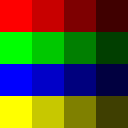

In [2]:
Image.open('n=4.jpg')

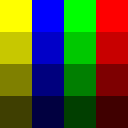

In [3]:
Image.open('n=4-90.jpg')

<h2 class="alert alert-info"> Diviser pour régner : qu'en est-il ici ?</h2>
L'idée est de découper l'image (carrée) en 4 sous-images (NO, NE, SO, SE). Puis de faire une permutation circulaire (dans le sens horaire) de ces 4 sous-images.

Ce procédé est répété de façon récursive, en subdivisant à chaque niveau de récurence l'image en 4  nouvelles  sous-images. 

Lorsque l'image ne fait plus qu'un pixel de large, la rotation est immédiate : il n'y a rien à faire !

Voir le fichier annexe ```explication-rotation.pdf```.

### *Remarque* : on se limitera ici à l'utilisation d'images carrées et dont la dimension est une puissance de 2 !

### L'algorithme de rotation (non détaillé) est donc le suivant :

<div class="alert alert-danger">
    
- Si l'image est de taille 1 px de large, ne rien faire ! (RÉGNER) <br>
- Sinon : <br>
    ° Faire la rotation des 4 sous-images (appel récursif à la fonction de rotation) (DIVISER) <br>
    ° "Replacer" dans l'image d'origine ces 4 sous-images pivotées, en permutant leur position d'origine d'un quart de tour (ex : NO devient NE, SO devient NO, etc...). (COMBINER) <br>
    
    </div>

<h1 class="alert alert-info">Au travail !</1>

<h3 class="alert alert-warning">Charger, puis visualiser, le fichier image 'yoda.jpg'</h3>

In [ ]:
# A vous de jouer
# ...
Image.open('yoda.jpg')

<h3 class="alert alert-warning">Tester la manipulation de l'image-matrice</h3>

On commence par obtenir la matrice ```m``` de l'image pour effectuer les modifications directement sur celle-ci.
        
       Rappel : m[x, y] est le pixel de coordonnées (x, y).
       
Un pixel est un triplet de 3 nombres représentant ses composantes R, V, B (chacune codée sur 1 octet : entier entre 0 et 255).

In [ ]:
yoda = Image.open('yoda.jpg')
yoda_matrice = yoda.load()

In [ ]:
for x in range(10, 200):
    yoda_matrice[x, 30] = (0, 0, 255) # trait horizontal bleu
    
for y in range(100, 400):
    yoda_matrice[50, y] = (255, 0, 0) # trait vertical rouge

for x in range(400, 500):   
    for y in range(40, 100):
        yoda_matrice[x, y] = (255, 0, 255) # rectangle magenta
        yoda_matrice[x, 5*y] = (0, 255, 255) # hachures cyan

In [ ]:
yoda.show()

<h3 class="alert alert-warning">Préliminaire : permuter des blocs de pixels</h3>

Avant d'écrire la fonction complète de rotation, nous allons d'abord apprendre à permuter des blocs de pixels dans une image.

**Rappel : Python autorise la permutation de variables en une seule instruction :**

*Exemple :*

    a, b, c = 1, 2, 3
    a, b, c = b, c, a
    
Après ces 2 instructions : a vaut 2, b vaut 3 et c vaut 1 !

### 1. Analyser la fonction mystere_1 ci dessous et expliquer son fonctionnement.

In [ ]:
def mystere_1(img):  
    """ But : ???
    * Entrée : img : une image PIL.
    """
    m = img.load()
    i, j = 200, 100
    t = 140
    m[i+t, j], m[i+t, j+t], m[i, j+t], m[i, j] = m[i, j], m[i+t, j], m[i+t, j+t], m[i, j+t]

### 2. Analyser la fonction mystere_2 ci dessous et expliquer son fonctionnement.

In [ ]:
def mystere_2(img):  
    """ But : ???
    * Entrée : img : une image PIL.
    """
    m = img.load()
    t = 140
    for i in range(t):
        for j in range(t):      
             m[i+t, j], m[i+t, j+t], m[i, j+t], m[i, j] = m[i, j], m[i+t, j], m[i+t, j+t], m[i, j+t]

In [ ]:
# test
yoda = Image.open('yoda.jpg')
mystere_2(yoda)
yoda.show()

### 3. Généralisation.

On désire écrire une fonction qui permet de permuter 4 blocs carrés de pixels à l'intérieur d'une image.

COMPLETER LA FONCTION CI-DESSOUS.

*Complément* : expliquer l'intérêt de l'instruction assert.

In [ ]:
def permutation(img, x, y, t):  
    """ Effectue la permutation de 4 blocs carrés de pixels dans une image. 
    * Entrée : 
    - img : une image PIL.
    - x, y : cooordonnées du coin supérieur gauche d'où commencent les permutations.
    - t : taille des blocs à permuter.
    """
    m = img.load()
    taille = img.size[0]
    assert (x + 2*t) <= taille and  (y + 2*t) <= taille
    # A VOUS DE JOUER
    # ....
    

In [ ]:
# test
yoda = Image.open('yoda.jpg')
permutation(yoda, 192, 64, 64)
yoda.show()

<h3 class="alert alert-warning">Écriture de la fonction de rotation</h3>

On rappelle à nouveau l'algorithme de rotation décrit plus haut :

<div class="alert alert-danger">
    
- Si l'image est de taille 1 px de large, ne rien faire !<br>
- Sinon : <br>
    ° Faire la rotation des 4 sous-images (appel récursif à la fonction de rotation) : chaque sous-image a une taille moitié par rapport à l'image d'origine. <br>
    ° Effectuer une permutation circulaire de ces 4 sous-images. <br>
    </div>

   
La fonction récursive de rotation ```rotation(m, x, y, t)``` prend 4 paramètres en entrée :

- la matrice-image m
- les coordonnées x et y du coin supérieur gauche de la portion d'image à pivoter
- la taille en pixels t de la portion carrée d'image à pivoter (t est un entier, puissance de 2)

Pour faire pivoter l'image entière, cette fonction est appelée initialement avec les valeurs : x=0, y=0 et t=taille de l'image.

In [ ]:
def rotation(m, x, y, t):  
    """ Effectue la rotation d'un 1/4 de tour d'une image décrite par une matrice de pixels. 
    * Entrée : 
    - m : la matrice de pixels
    - x, y : cooordonnées du coin supérieur gauche de la portion d'image à pivoter.
    - t : taille de la portion d'image à pivoter.
    Remarque : la matrice image est modifiée en place.
    """
    # A VOUS DE JOUER
    # ....
    

In [ ]:
# test
yoda = Image.open('yoda.jpg')
yoda_matrice = yoda.load()
rotation(yoda_matrice, 0, 0, yoda.size[0]) 
yoda.show()

<h2 class="alert alert-info">Faire tourner une portion interne de l'image</h2>
           
Modifier l'appel initial de la fonction de rotation pour ne faire tourner que des portions de l'image (penser à conserver une puissance de 2 pour la taille t).  

**Défi** : Faire les rotations nécessaires pour obtenir cette image :

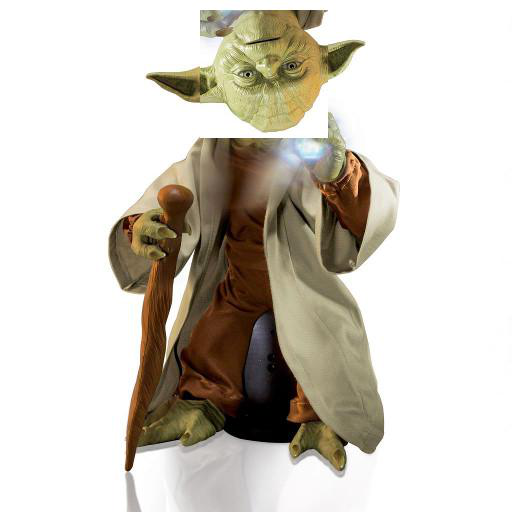

In [4]:
Image.open('tete_renversee.jpg')

In [ ]:
yoda = Image.open('yoda.jpg')
yoda_matrice = yoda.load()
# A VOUS DE JOUER
# ....